In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math, nltk
from nltk.corpus import wordnet

In [2]:
df_init=pd.read_csv('recommender_movie_metadata.csv')
df_init.shape

(5043, 28)

In [3]:
pd.DataFrame(df_init.dtypes).T

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,object,object,float64,float64,float64,float64,object,float64,float64,object,...,float64,object,object,object,float64,float64,float64,float64,float64,int64


In [4]:
tab_info=pd.DataFrame(df_init.dtypes).T.rename(index={0:'column type'})
tab_info

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
column type,object,object,float64,float64,float64,float64,object,float64,float64,object,...,float64,object,object,object,float64,float64,float64,float64,float64,int64


In [6]:
tab_info=tab_info.append(pd.DataFrame(df_init.isnull().sum()).T.rename(index={0:'null values'}))
tab_info

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
column type,object,object,float64,float64,float64,float64,object,float64,float64,object,...,float64,object,object,object,float64,float64,float64,float64,float64,int64
null values,19,104,50,15,104,23,13,7,884,0,...,21,12,5,303,492,108,13,0,329,0


In [7]:
tab_info=tab_info.append(pd.DataFrame(df_init.isnull().sum()/df_init.shape[0]*100).T.rename(index={0:'null value %'}))
tab_info

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
column type,object,object,float64,float64,float64,float64,object,float64,float64,object,...,float64,object,object,object,float64,float64,float64,float64,float64,int64
null values,19,104,50,15,104,23,13,7,884,0,...,21,12,5,303,492,108,13,0,329,0
null value %,0.37676,2.06226,0.991473,0.297442,2.06226,0.456078,0.257783,0.138806,17.5292,0,...,0.416419,0.237954,0.0991473,6.00833,9.7561,2.14158,0.257783,0,6.52389,0


In [8]:
df_init.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
df_init.plot_keywords[:5]

0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [10]:
set_keywords=set()
for list_keywords in df_init.plot_keywords.str.split('|'):
    if isinstance(list_keywords, float):
        continue
    set_keywords=set_keywords.union(list_keywords)
print(len(set_keywords))

8086


In [11]:
def count_word(df, col, liste):
    keyword_count=dict()
    for s in liste:
        keyword_count[s]=0
    for list_keywords in df[col].str.split('|'):
        if type(list_keywords)==float and pd.isnull(list_keywords):
            continue
        for s in list_keywords:
            if(pd.notnull(s)):
                keyword_count[s] +=1
    
    keyword_occurence=[]
    for k, v in keyword_count.items():
        keyword_occurence.append([k,v])
    
    keyword_occurence.sort(key=lambda x: x[1], reverse=True)
    
    return keyword_occurence, keyword_count

In [12]:
keyword_occurence, dum=count_word(df_init, 'plot_keywords', set_keywords)

In [13]:
print(keyword_occurence[:10])

[['love', 198], ['friend', 166], ['murder', 161], ['death', 132], ['police', 126], ['new york city', 91], ['high school', 89], ['alien', 82], ['school', 73], ['boy', 72]]


In [14]:
np.unique(list(dum.values()))

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  51,  52,  56,  57,
        60,  61,  62,  66,  68,  70,  71,  72,  73,  82,  89,  91, 126,
       132, 161, 166, 198])

In [15]:
from wordcloud import WordCloud, STOPWORDS

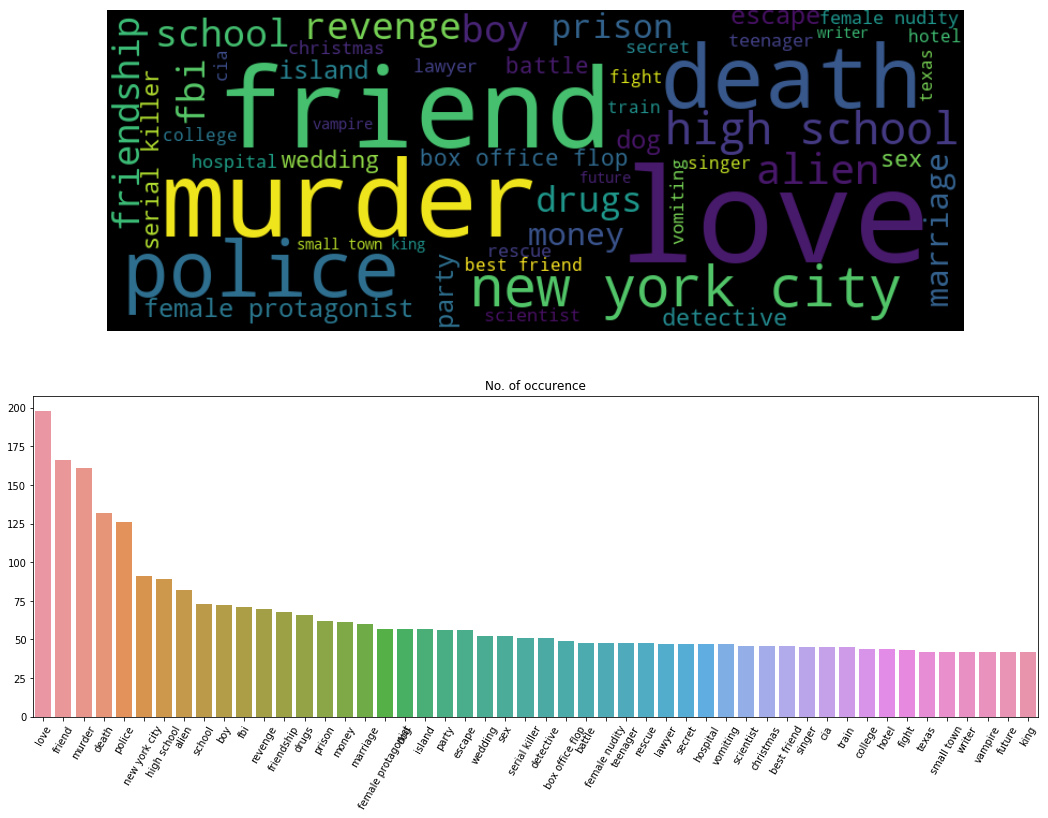

In [16]:
words=dict()
for s in keyword_occurence[:50]:
    words[s[0]]=s[1]
    
fig=plt.figure(figsize=(18,13))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

wordcloud=WordCloud(width=800, height=300, background_color='black', stopwords=STOPWORDS, normalize_plurals=False, 
                    relative_scaling=1)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation='bilinear')
ax1.axis('off')

g=sns.barplot([i[0] for i in keyword_occurence[:50]], [i[1] for i in keyword_occurence[:50]], ax=ax2)
g.set_title("No. of occurence")
for item in g.get_xticklabels():
    item.set_rotation(60)

#plt.title("keywords popularity", bbox={'facecolor':'k', 'pad':5}, color='w', fontsize=25)
plt.show()

In [17]:
1-df_init.isnull().sum()/df_init.shape[0]

color                        0.996232
director_name                0.979377
num_critic_for_reviews       0.990085
duration                     0.997026
director_facebook_likes      0.979377
actor_3_facebook_likes       0.995439
actor_2_name                 0.997422
actor_1_facebook_likes       0.998612
gross                        0.824708
genres                       1.000000
actor_1_name                 0.998612
movie_title                  1.000000
num_voted_users              1.000000
cast_total_facebook_likes    1.000000
actor_3_name                 0.995439
facenumber_in_poster         0.997422
plot_keywords                0.969661
movie_imdb_link              1.000000
num_user_for_reviews         0.995836
language                     0.997620
country                      0.999009
content_rating               0.939917
budget                       0.902439
title_year                   0.978584
actor_2_facebook_likes       0.997422
imdb_score                   1.000000
aspect_ratio

In [18]:
type(df_init.isnull().sum())

pandas.core.series.Series

In [25]:
missing_df=df_init.isnull().sum().reset_index()
print(type(missing_df))
missing_df

<class 'pandas.core.frame.DataFrame'>


,index,0
0,color,19
1,director_name,104
2,num_critic_for_reviews,50
3,duration,15
4,director_facebook_likes,104
5,actor_3_facebook_likes,23
6,actor_2_name,13
7,actor_1_facebook_likes,7
8,gross,884
9,genres,0


In [26]:
missing_df.columns=['column_name','missing_count']
missing_df['filling_factor']=(1-missing_df.missing_count/df_init.shape[0])*100
missing_df.head()

,column_name,missing_count,filling_factor
0,color,19,99.623240
1,director_name,104,97.937735
2,num_critic_for_reviews,50,99.008527
3,duration,15,99.702558
4,director_facebook_likes,104,97.937735


In [28]:
missing_df.sort_values('filling_factor').reset_index()

,index,column_name,missing_count,filling_factor
0,8,gross,884,82.470752
1,22,budget,492,90.243902
2,26,aspect_ratio,329,93.476105
3,21,content_rating,303,93.991672
4,16,plot_keywords,153,96.966092
5,23,title_year,108,97.858418
6,1,director_name,104,97.937735
7,4,director_facebook_likes,104,97.937735
8,2,num_critic_for_reviews,50,99.008527
9,5,actor_3_facebook_likes,23,99.543922


In [29]:
missing_df.sort_values('filling_factor').reset_index(drop=True)

,column_name,missing_count,filling_factor
0,gross,884,82.470752
1,budget,492,90.243902
2,aspect_ratio,329,93.476105
3,content_rating,303,93.991672
4,plot_keywords,153,96.966092
5,title_year,108,97.858418
6,director_name,104,97.937735
7,director_facebook_likes,104,97.937735
8,num_critic_for_reviews,50,99.008527
9,actor_3_facebook_likes,23,99.543922


In [32]:
df_init['decade']=df_init.title_year.apply(lambda x: ((x-1900)//10)*10)
df_init.decade.value_counts()

100.0    2100
110.0    1497
90.0      786
80.0      291
70.0      114
60.0       73
50.0       28
40.0       25
30.0       15
20.0        5
10.0        1
Name: decade, dtype: int64

In [35]:
df_init.title_year.groupby(df_init.decade).count()

decade
10.0        1
20.0        5
30.0       15
40.0       25
50.0       28
60.0       73
70.0      114
80.0      291
90.0      786
100.0    2100
110.0    1497
Name: title_year, dtype: int64

In [36]:
def get_stats(gr):
    return {'min':gr.min(), 'mean': gr.max(), 'max':gr.max(), 'count': gr.count()}
df_init.title_year.groupby(df_init.decade).apply(get_stats)

decade       
10.0    count       1.0
        max      1916.0
        mean     1916.0
        min      1916.0
20.0    count       5.0
        max      1929.0
        mean     1929.0
        min      1920.0
30.0    count      15.0
        max      1939.0
        mean     1939.0
        min      1930.0
40.0    count      25.0
        max      1949.0
        mean     1949.0
        min      1940.0
50.0    count      28.0
        max      1959.0
        mean     1959.0
        min      1950.0
60.0    count      73.0
        max      1969.0
        mean     1969.0
        min      1960.0
70.0    count     114.0
        max      1979.0
        mean     1979.0
        min      1970.0
80.0    count     291.0
        max      1989.0
        mean     1989.0
        min      1980.0
90.0    count     786.0
        max      1999.0
        mean     1999.0
        min      1990.0
100.0   count    2100.0
        max      2009.0
        mean     2009.0
        min      2000.0
110.0   count    1497.0
  

In [40]:
test=df_init.title_year.groupby(df_init.decade).apply(get_stats).unstack()

In [38]:
def label(s):
    val= 1900+s if s>100 else s
    return "" if s<50 else "{}'s".format(int(val))
print(label(40))
print(label(80))
print(label(100))


80's
100's


In [55]:
test.index.values

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,
        100.,  110.])

In [52]:
test['count'].values

array([  1.00000000e+00,   5.00000000e+00,   1.50000000e+01,
         2.50000000e+01,   2.80000000e+01,   7.30000000e+01,
         1.14000000e+02,   2.91000000e+02,   7.86000000e+02,
         2.10000000e+03,   1.49700000e+03])

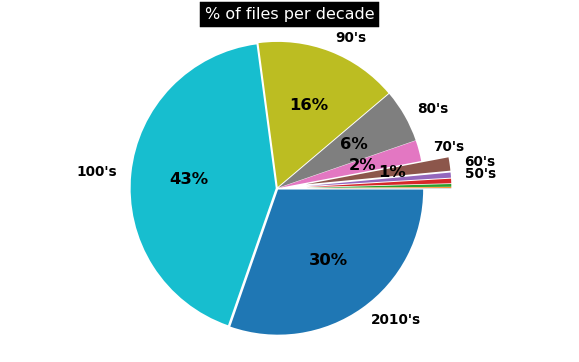

In [57]:
sns.set_context("poster", font_scale=0.85)
plt.rc('font',weight='bold')
f, ax=plt.subplots(figsize=(10,6))
sizes=test['count'].values
labels=[label(s) for s in test.index]
explode = [0.2 if sizes[i] < 100 else 0.01 for i in range(11)]
ax.pie(sizes, explode=explode, labels=labels, shadow=False, startangle=0, 
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '')
ax.axis('equal')
ax.set_title('% of files per decade', fontsize=16, color='w', bbox={'facecolor':'k', 'pad':5})

In [59]:
genre_labels=set()
for s in df_init.genres.str.split('|'):
    genre_labels=genre_labels.union(s)
genre_labels

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [61]:
keyword_occurence, dum=count_word(df_init, 'genres', genre_labels)
keyword_occurence[:5]

[['Drama', 2594],
 ['Comedy', 1872],
 ['Thriller', 1411],
 ['Action', 1153],
 ['Romance', 1107]]

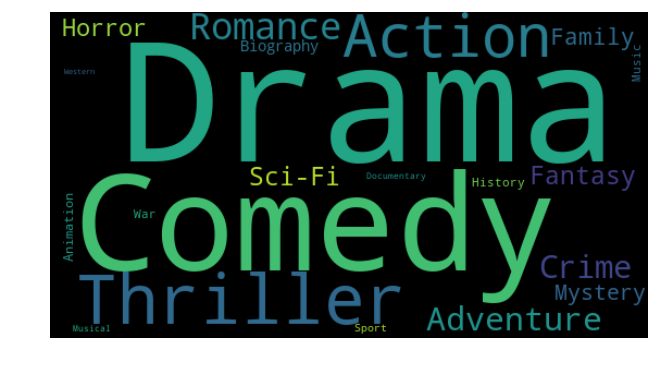

In [63]:
words=dict()
for s in keyword_occurence[:50]:
    words[s[0]]=s[1]
f, ax=plt.subplots(figsize=(12,6))
wordcloud=WordCloud(width=550, height=300, background_color='black',max_words=1628, relative_scaling=0.7,normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
df_init.duplicated().value_counts()

False    4998
True       45
dtype: int64

In [67]:
dup_entries=df_init[df_init.duplicated()]

In [68]:
print(df_init.shape)
df_temp=df_init.drop_duplicates()
print(df_temp.shape)

(5043, 29)
(4998, 29)


In [69]:
var_dups=['movie_title','title_year','director_name']
df_temp.movie_title.value_counts()>1

Ben-Hur                                                         True
King Kong                                                       True
Home                                                            True
Clash of the Titans                                             True
Skyfall                                                         True
TRON: Legacy                                                    True
The Astronaut's Wife                                            True
Point Break                                                     True
The Day the Earth Stood Still                                   True
Planet of the Apes                                              True
Juno                                                            True
Brothers                                                        True
Around the World in 80 Days                                     True
The Omen                                                        True
The Gift                          

In [71]:
liste_duplicates=df_temp.movie_title.map(df_temp.movie_title.value_counts()>1)
liste_duplicates

0       False
1       False
2       False
3       False
4       False
5       False
6        True
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
        ...  
5013    False
5014    False
5015    False
5016    False
5017    False
5018    False
5019    False
5020    False
5021    False
5022    False
5023    False
5024    False
5025    False
5026    False
5027    False
5028    False
5029    False
5030    False
5031    False
5032    False
5033    False
5034    False
5035    False
5036    False
5037    False
5038    False
5039    False
5040    False
5041    False
5042    False
Name: movie_title, Length: 4998, dtype: bool

In [73]:
print("duplicated titles:")
df_temp[liste_duplicates].shape

duplicated titles:


(159, 29)

In [74]:
df_temp[liste_duplicates][var_dups].sort_values('movie_title')

,movie_title,title_year,director_name
3711,"20,000 Leagues Under the Sea",1954.0,Richard Fleischer
4894,"20,000 Leagues Under the Sea",1954.0,Richard Fleischer
4352,A Nightmare on Elm Street,1984.0,Wes Craven
1420,A Nightmare on Elm Street,1984.0,Wes Craven
1113,Across the Universe,2007.0,Julie Taymor
4842,Across the Universe,2007.0,Julie Taymor
4128,Alice in Wonderland,2010.0,Tim Burton
33,Alice in Wonderland,2010.0,Tim Burton
2639,Aloha,2015.0,Cameron Crowe
1389,Aloha,2015.0,Cameron Crowe


In [76]:
df_init.iloc[[3711,4894]].T

,3711,4894
color,Color,Color
director_name,Richard Fleischer,Richard Fleischer
num_critic_for_reviews,69,69
duration,127,127
director_facebook_likes,130,130
actor_3_facebook_likes,51,51
actor_2_name,Robert J. Wilke,Robert J. Wilke
actor_1_facebook_likes,617,618
gross,NaN,NaN
genres,Adventure|Drama|Family|Fantasy|Sci-Fi,Adventure|Drama|Family|Fantasy|Sci-Fi


In [80]:
df_init.iloc[3711]!=df_init.iloc[4894]

color                        False
director_name                False
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                 False
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users               True
cast_total_facebook_likes     True
actor_3_name                 False
facenumber_in_poster         False
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews         False
language                     False
country                      False
content_rating               False
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
decade              

In [81]:
pd.DataFrame(df_init.iloc[3711]!=df_init.iloc[4894], columns=['similar columns'])

,similar columns
color,False
director_name,False
num_critic_for_reviews,False
duration,False
director_facebook_likes,False
actor_3_facebook_likes,False
actor_2_name,False
actor_1_facebook_likes,True
gross,True
genres,False


In [83]:
print(df_temp.shape)
df_duplicated_cleaned=df_temp.drop_duplicates(subset=var_dups, keep='last')
print(df_duplicated_cleaned.shape)

(4998, 29)
(4919, 29)


In [85]:
def keyword_inventory(dataframe, col='plot_keywords'):
    PS=nltk.stem.PorterStemmer()
    keyword_root=dict()
    keyword_select=dict()
    category_keys=[]
    icount=0
    for s in dataframe[col]:
        if (pd.isnull(s)):continue
        for t in s.split('|'):
            t=t.lower()
            racine=PS.stem(t)
            if racine in keyword_root:
                keyword_root[racine].add(t)
            else:
                keyword_root[racine]={t}
        
    for s in keyword_root.keys():
        if(len(keyword_root[s])>1):
            min_length=1000
            for k in keyword_root[s]:
                if(len(k)<min_length):
                    clef=k
                    min_length=len(k)
            category_keys.append(clef)
            keyword_select[s]=clef
            
        else:
            category_keys.append(list(keyword_root[s])[0])
            keyword_select[s]=list(keyword_root[s])[0]
    
    print("No. of keywords in variable '{}': {}".format(col,len(category_keys)))
    return category_keys, keyword_root, keyword_select

In [89]:
keywords, keywords_roots, keywords_select = keyword_inventory(df_duplicated_cleaned, col = 'plot_keywords')

No. of keywords in variable 'plot_keywords': 7904


In [94]:
keywords[:10]

['avatar',
 'future',
 'marine',
 'native',
 'paraplegic',
 'goddess',
 'marriage ceremony',
 'marriage proposal',
 'pirate',
 'singapore']

In [102]:
keywords_roots

{'avatar': {'avatar'},
 'futur': {'future'},
 'marin': {'marine'},
 'nativ': {'native', 'nativity'},
 'parapleg': {'paraplegic'},
 'goddess': {'goddess'},
 'marriage ceremoni': {'marriage ceremony'},
 'marriage propos': {'marriage proposal'},
 'pirat': {'pirate'},
 'singapor': {'singapore'},
 'bomb': {'bomb', 'bombing'},
 'espionag': {'espionage'},
 'sequel': {'sequel'},
 'spi': {'spy', 'spying'},
 'terrorist': {'terrorist'},
 'decept': {'deception'},
 'imprison': {'imprisonment'},
 'lawless': {'lawlessness'},
 'police offic': {'police officer'},
 'terrorist plot': {'terrorist plot'},
 'alien': {'alien', 'alienation'},
 'american civil war': {'american civil war'},
 'male nippl': {'male nipple'},
 'mar': {'mars'},
 'princess': {'princess'},
 '17th centuri': {'17th century'},
 'based on fairy tal': {'based on fairy tale'},
 'disney': {'disney'},
 'flower': {'flower'},
 'tower': {'tower'},
 'artificial intellig': {'artificial intelligence'},
 'based on comic book': {'based on comic book'

In [103]:
keywords_select

{'avatar': 'avatar',
 'futur': 'future',
 'marin': 'marine',
 'nativ': 'native',
 'parapleg': 'paraplegic',
 'goddess': 'goddess',
 'marriage ceremoni': 'marriage ceremony',
 'marriage propos': 'marriage proposal',
 'pirat': 'pirate',
 'singapor': 'singapore',
 'bomb': 'bomb',
 'espionag': 'espionage',
 'sequel': 'sequel',
 'spi': 'spy',
 'terrorist': 'terrorist',
 'decept': 'deception',
 'imprison': 'imprisonment',
 'lawless': 'lawlessness',
 'police offic': 'police officer',
 'terrorist plot': 'terrorist plot',
 'alien': 'alien',
 'american civil war': 'american civil war',
 'male nippl': 'male nipple',
 'mar': 'mars',
 'princess': 'princess',
 '17th centuri': '17th century',
 'based on fairy tal': 'based on fairy tale',
 'disney': 'disney',
 'flower': 'flower',
 'tower': 'tower',
 'artificial intellig': 'artificial intelligence',
 'based on comic book': 'based on comic book',
 'captain america': 'captain america',
 'marvel cinematic univers': 'marvel cinematic universe',
 'superhero

In [104]:
# Replacement of the keywords by the main form
#----------------------------------------------
def replacement_df_keywords(df, keywords_select, roots = False):
    df_new = df.copy(deep = True)
    for index, row in df_new.iterrows():
        chaine = row['plot_keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            clef = PS.stem(s) if roots else s
            if clef in keywords_select.keys():
                nouvelle_liste.append(keywords_select[clef])
            else:
                nouvelle_liste.append(s)       
        df_new.set_value(index, 'plot_keywords', '|'.join(nouvelle_liste)) 
    return df_new

In [107]:
# Replacement of the keywords by the main keyword
#-------------------------------------------------
PS=nltk.stem.PorterStemmer()
df_keywords_cleaned = replacement_df_keywords(df_duplicated_cleaned, keywords_select,roots = True)

In [108]:
keyword_occurences, keywords_count = count_word(df_keywords_cleaned,'plot_keywords',keywords)
keyword_occurences[:5]

[['love', 191],
 ['friend', 164],
 ['murder', 158],
 ['death', 129],
 ['police', 125]]

### todo

In [109]:
# get the synomyms of the word 'mot_cle'
#--------------------------------------------------------------
def get_synonymes(mot_cle):
    lemma = set()
    for ss in wordnet.synsets(mot_cle):
        for w in ss.lemma_names():
            #_______________________________
            # We just get the 'nouns':
            index = ss.name().find('.')+1
            if ss.name()[index] == 'n': lemma.add(w.lower().replace('_',' '))
    return lemma  

In [110]:
# Exemple of a list of synonyms given by NLTK
#---------------------------------------------------
mot_cle = 'alien'
lemma = get_synonymes(mot_cle)
for s in lemma:
    print(' "{:<30}" in keywords list -> {} {}'.format(s, s in keywords,
                                                keywords_count[s] if s in keywords else 0 ))

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - 'C:\\Users\\IBM_ADMIN/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'c:\\users\\ibm_admin\\appdata\\local\\programs\\python\\python36\\nltk_data'
    - 'c:\\users\\ibm_admin\\appdata\\local\\programs\\python\\python36\\lib\\nltk_data'
    - 'C:\\Users\\IBM_ADMIN\\AppData\\Roaming\\nltk_data'
**********************************************************************

In [111]:
# check if 'mot' is a key of 'key_count' with a test on the number of occurences   
#----------------------------------------------------------------------------------
def test_keyword(mot, key_count, threshold):
    return (False , True)[key_count.get(mot, 0) >= threshold]

In [112]:
keyword_occurences.sort(key = lambda x:x[1], reverse = False)
key_count = dict()
for s in keyword_occurences:
    key_count[s[0]] = s[1]
#__________________________________________________________________________
# Creation of a dictionary to replace keywords by higher frequency keywords
remplacement_mot = dict()
icount = 0
for index, [mot, nb_apparitions] in enumerate(keyword_occurences):
    if nb_apparitions > 5: continue  # only the keywords that appear less than 5 times
    lemma = get_synonymes(mot)
    if len(lemma) == 0: continue     # case of the plurals
    #_________________________________________________________________
    liste_mots = [(s, key_count[s]) for s in lemma 
                  if test_keyword(s, key_count, key_count[mot])]
    liste_mots.sort(key = lambda x:(x[1],x[0]), reverse = True)    
    if len(liste_mots) <= 1: continue       # no replacement
    if mot == liste_mots[0][0]: continue    # replacement by himself
    icount += 1
    if  icount < 8:
        print('{:<12} -> {:<12} (init: {})'.format(mot, liste_mots[0][0], liste_mots))    
    remplacement_mot[mot] = liste_mots[0][0]

print(90*'_'+'\n'+'The replacement concerns {}% of the keywords.'
      .format(round(len(remplacement_mot)/len(keywords)*100,2)))

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - 'C:\\Users\\IBM_ADMIN/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'c:\\users\\ibm_admin\\appdata\\local\\programs\\python\\python36\\nltk_data'
    - 'c:\\users\\ibm_admin\\appdata\\local\\programs\\python\\python36\\lib\\nltk_data'
    - 'C:\\Users\\IBM_ADMIN\\AppData\\Roaming\\nltk_data'
**********************************************************************

In [113]:
# 2 successive replacements
#---------------------------
print('Keywords that appear both in keys and values:'.upper()+'\n'+45*'-')
icount = 0
for s in remplacement_mot.values():
    if s in remplacement_mot.keys():
        icount += 1
        if icount < 10: print('{:<20} -> {:<20}'.format(s, remplacement_mot[s]))

for key, value in remplacement_mot.items():
    if value in remplacement_mot.keys():
        remplacement_mot[key] = remplacement_mot[value]        

KEYWORDS THAT APPEAR BOTH IN KEYS AND VALUES:
---------------------------------------------


In [118]:
# replacement of keyword varieties by the main keyword
#----------------------------------------------------------
df_keywords_synonyms =replacement_df_keywords(df_keywords_cleaned, remplacement_mot, roots = False)   
keywords, keywords_roots, keywords_select = keyword_inventory(df_keywords_synonyms, col = 'plot_keywords')

No. of keywords in variable 'plot_keywords': 7904


In [119]:
new_keyword_occurences, keywords_count = count_word(df_keywords_synonyms,'plot_keywords',keywords)
new_keyword_occurences[:5]

[['love', 191],
 ['friend', 164],
 ['murder', 158],
 ['death', 129],
 ['police', 125]]

In [120]:
# deletion of keywords with low frequencies
#-------------------------------------------
def remplacement_df_low_frequency_keywords(df, keyword_occurences):
    df_new = df.copy(deep = True)
    key_count = dict()
    for s in keyword_occurences: 
        key_count[s[0]] = s[1]    
    for index, row in df_new.iterrows():
        chaine = row['plot_keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            if key_count.get(s, 4) > 3: nouvelle_liste.append(s)
        df_new.set_value(index, 'plot_keywords', '|'.join(nouvelle_liste))
    return df_new

In [122]:
# Creation of a dataframe where keywords of low frequencies are suppressed
#-------------------------------------------------------------------------
df_keywords_occurence =  remplacement_df_low_frequency_keywords(df_keywords_synonyms, new_keyword_occurences)
keywords, keywords_roots, keywords_select = keyword_inventory(df_keywords_occurence, col = 'plot_keywords')   

No. of keywords in variable 'plot_keywords': 1294


In [123]:
# New keywords count
#-------------------
new_keyword_occurences, keywords_count = count_word(df_keywords_occurence, 'plot_keywords',keywords)
new_keyword_occurences[:5]

[['love', 191],
 ['friend', 164],
 ['murder', 158],
 ['death', 129],
 ['police', 125]]

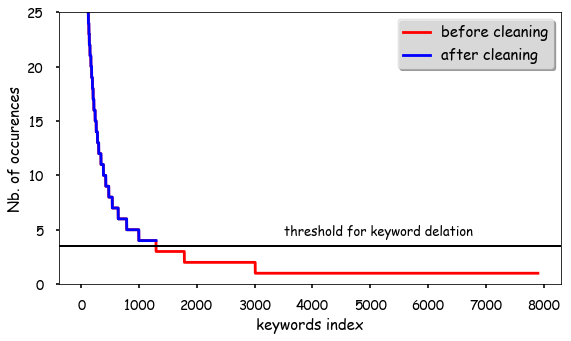

In [124]:
# Graph of keyword occurences
#----------------------------
font = {'family' : 'fantasy', 'weight' : 'normal', 'size'   : 15}
mpl.rc('font', **font)

keyword_occurences.sort(key = lambda x:x[1], reverse = True)

y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]

new_y_axis = [i[1] for i in new_keyword_occurences]
new_x_axis = [k for k,i in enumerate(new_keyword_occurences)]

f, ax = plt.subplots(figsize=(9, 5))
ax.plot(x_axis, y_axis, 'r-', label='before cleaning')
ax.plot(new_x_axis, new_y_axis, 'b-', label='after cleaning')

# Now add the legend with some customizations.
legend = ax.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('medium')
            
plt.ylim((0,25))
plt.axhline(y=3.5, linewidth=2, color = 'k')
plt.xlabel("keywords index", family='fantasy', fontsize = 15)
plt.ylabel("Nb. of occurences", family='fantasy', fontsize = 15)
#plt.suptitle("Nombre d'occurences des mots clés", fontsize = 18, family='fantasy')
plt.text(3500, 4.5, 'threshold for keyword delation', fontsize = 13)
plt.show()

### end of todo

In [128]:
# correlation
corrmat=df_keywords_occurence.dropna(how='any').corr()
k=17 # number of variable for heatmap


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,decade
num_critic_for_reviews,1.000000,0.222951,0.179643,0.245581,0.163801,0.453580,0.590873,0.232337,-0.032313,0.559192,0.100878,0.420488,0.251428,0.352819,0.176048,0.704771,0.423668
duration,0.222951,1.000000,0.183493,0.122335,0.082878,0.238787,0.336338,0.118114,0.029060,0.343432,0.064770,-0.136304,0.127734,0.369339,0.151272,0.214724,-0.129884
director_facebook_likes,0.179643,0.183493,1.000000,0.118497,0.090182,0.136797,0.305072,0.118966,-0.047352,0.223327,0.017458,-0.046234,0.114833,0.195884,0.038973,0.165830,-0.038290
actor_3_facebook_likes,0.245581,0.122335,0.118497,1.000000,0.248242,0.278149,0.258431,0.479819,0.107045,0.201887,0.036654,0.114884,0.542836,0.069060,0.048920,0.264107,0.112715
actor_1_facebook_likes,0.163801,0.082878,0.090182,0.248242,1.000000,0.139534,0.176990,0.946641,0.056263,0.122371,0.014580,0.094546,0.386771,0.093881,0.057882,0.126705,0.087285
gross,0.453580,0.238787,0.136797,0.278149,0.139534,1.000000,0.623470,0.223651,-0.030665,0.543093,0.093887,0.046157,0.238025,0.216461,0.064333,0.355231,0.049675
num_voted_users,0.590873,0.336338,0.305072,0.258431,0.176990,0.623470,1.000000,0.242640,-0.033969,0.782982,0.063405,0.021501,0.237799,0.483574,0.084817,0.518534,0.027243
cast_total_facebook_likes,0.232337,0.118114,0.118966,0.479819,0.946641,0.223651,0.242640,1.000000,0.079454,0.177171,0.025777,0.125233,0.635842,0.107093,0.070570,0.199454,0.117153
facenumber_in_poster,-0.032313,0.029060,-0.047352,0.107045,0.056263,-0.030665,-0.033969,0.079454,1.000000,-0.078842,-0.021791,0.068798,0.072250,-0.066536,0.019384,0.011198,0.070795
num_user_for_reviews,0.559192,0.343432,0.223327,0.201887,0.122371,0.543093,0.782982,0.177171,-0.078842,1.000000,0.066749,0.019341,0.185338,0.328285,0.093610,0.376638,0.021859


In [130]:
corrmat.num_voted_users

num_critic_for_reviews       0.590873
duration                     0.336338
director_facebook_likes      0.305072
actor_3_facebook_likes       0.258431
actor_1_facebook_likes       0.176990
gross                        0.623470
num_voted_users              1.000000
cast_total_facebook_likes    0.242640
facenumber_in_poster        -0.033969
num_user_for_reviews         0.782982
budget                       0.063405
title_year                   0.021501
actor_2_facebook_likes       0.237799
imdb_score                   0.483574
aspect_ratio                 0.084817
movie_facebook_likes         0.518534
decade                       0.027243
Name: num_voted_users, dtype: float64

In [133]:
corrmat.nlargest(4, 'num_voted_users')

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,decade
num_voted_users,0.590873,0.336338,0.305072,0.258431,0.176990,0.623470,1.000000,0.242640,-0.033969,0.782982,0.063405,0.021501,0.237799,0.483574,0.084817,0.518534,0.027243
num_user_for_reviews,0.559192,0.343432,0.223327,0.201887,0.122371,0.543093,0.782982,0.177171,-0.078842,1.000000,0.066749,0.019341,0.185338,0.328285,0.093610,0.376638,0.021859
gross,0.453580,0.238787,0.136797,0.278149,0.139534,1.000000,0.623470,0.223651,-0.030665,0.543093,0.093887,0.046157,0.238025,0.216461,0.064333,0.355231,0.049675
num_critic_for_reviews,1.000000,0.222951,0.179643,0.245581,0.163801,0.453580,0.590873,0.232337,-0.032313,0.559192,0.100878,0.420488,0.251428,0.352819,0.176048,0.704771,0.423668


In [127]:
cols=corrmat.nlargest(k, 'num_voted_users')['num_voted_users']
cols

num_voted_users              1.000000
num_user_for_reviews         0.782982
gross                        0.623470
num_critic_for_reviews       0.590873
movie_facebook_likes         0.518534
imdb_score                   0.483574
duration                     0.336338
director_facebook_likes      0.305072
actor_3_facebook_likes       0.258431
cast_total_facebook_likes    0.242640
actor_2_facebook_likes       0.237799
actor_1_facebook_likes       0.176990
aspect_ratio                 0.084817
budget                       0.063405
decade                       0.027243
title_year                   0.021501
facenumber_in_poster        -0.033969
Name: num_voted_users, dtype: float64

In [136]:
cols = corrmat.nlargest(k, 'num_voted_users')['num_voted_users'].index
cols

Index(['num_voted_users', 'num_user_for_reviews', 'gross',
       'num_critic_for_reviews', 'movie_facebook_likes', 'imdb_score',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'cast_total_facebook_likes', 'actor_2_facebook_likes',
       'actor_1_facebook_likes', 'aspect_ratio', 'budget', 'decade',
       'title_year', 'facenumber_in_poster'],
      dtype='object')

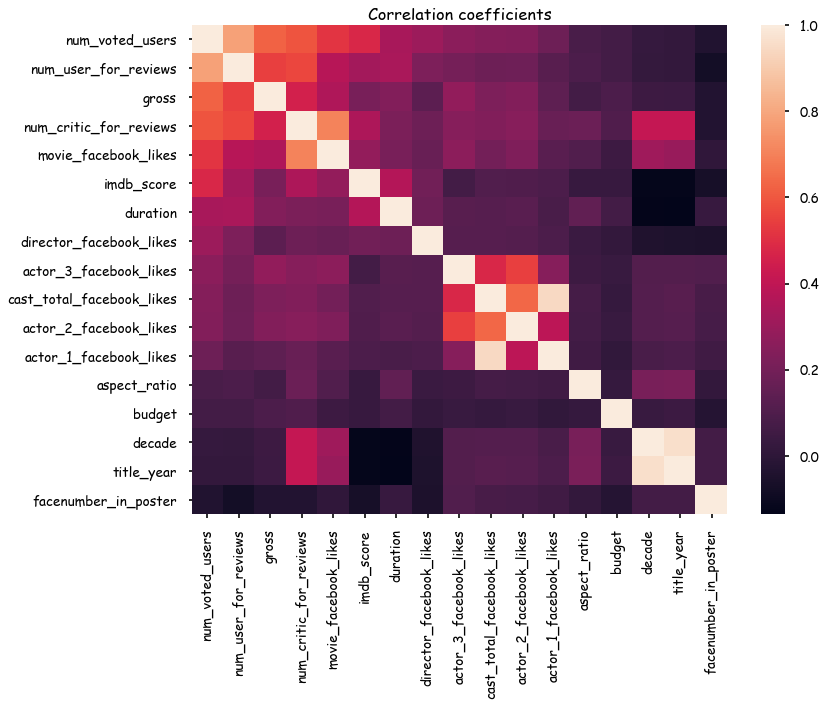

In [137]:
f, ax=plt.subplots(figsize=(12,9))
cm=np.corrcoef(df_keywords_occurence[cols].dropna(how='any').values.T)
sns.heatmap(cm, xticklabels=cols.values, yticklabels=cols).set_title('Correlation coefficients')


In [138]:
df_keywords_occurence.content_rating.unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Unrated', 'Approved', 'TV-Y', 'NC-17', 'Not Rated', 'TV-Y7', 'GP',
       'Passed', 'M', 'X'], dtype=object)

In [139]:
#__________
# dropping
dropped_var = ['aspect_ratio', 'budget', 'facenumber_in_poster',
               'content_rating', 'cast_total_facebook_likes']
df_var_cleaned = df_keywords_occurence.drop(dropped_var, axis = 1)
#________________
# and reordering
new_col_order = ['movie_title', 'title_year', 'genres', 'plot_keywords', 
                 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
                 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                 'actor_3_facebook_likes', 'movie_facebook_likes', 'num_critic_for_reviews', 
                 'num_user_for_reviews', 'num_voted_users', 'language', 'country',
                 'imdb_score', 'movie_imdb_link', 'color', 'duration', 'gross', ]
df_var_cleaned = df_var_cleaned[new_col_order]

In [142]:
missing=df_var_cleaned.isnull().sum().reset_index()
missing.columns=['column name','missing count']
missing['fill']=(1-missing['missing count']/df_var_cleaned.shape[0])*100
missing=missing.sort_values('fill').reset_index(drop=True)
missing

,column name,missing count,fill
0,gross,863,82.455784
1,plot_keywords,151,96.930270
2,title_year,106,97.845090
3,director_name,102,97.926408
4,director_facebook_likes,102,97.926408
5,num_critic_for_reviews,49,99.003863
6,actor_3_name,23,99.532425
7,actor_3_facebook_likes,23,99.532425
8,num_user_for_reviews,21,99.573084
9,color,19,99.613743


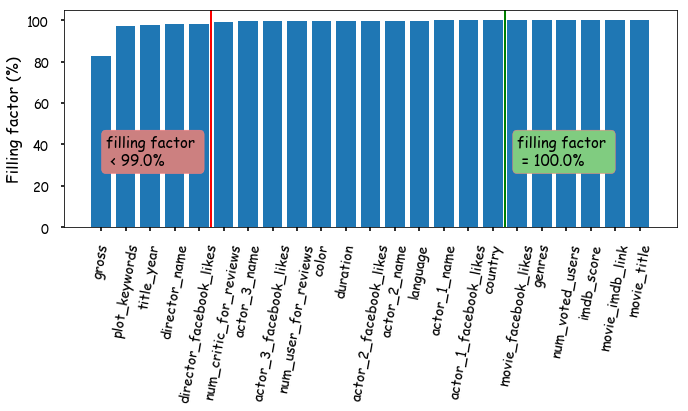

In [146]:
y_axis = missing['fill'] 
x_label = missing['column name']
x_axis = missing.index

fig = plt.figure(figsize=(11, 4))
plt.xticks(rotation=80, fontsize = 14)
plt.yticks(fontsize = 13)

N_thresh = 5
plt.axvline(x=N_thresh-0.5, linewidth=2, color = 'r')
plt.text(N_thresh-4.8, 30, 'filling factor \n < {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1.0, 0.5, 0.5),
                   fc=(0.8, 0.5, 0.5)))
N_thresh = 17
plt.axvline(x=N_thresh-0.5, linewidth=2, color = 'g')
plt.text(N_thresh, 30, 'filling factor \n = {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(0.5, 0.8, 0.5)))

plt.xticks(x_axis, x_label,family='fantasy', fontsize = 14 )
plt.ylabel('Filling factor (%)', family='fantasy', fontsize = 16)
plt.bar(x_axis, y_axis);

In [148]:
# fill missing year
df_filling=df_var_cleaned.copy()
missing_year=df_filling[df_filling.title_year.isnull()][['director_name','actor_1_name', 'actor_2_name', 'actor_3_name']]
missing_year.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name
4,Doug Walker,Doug Walker,Rob Walker,NaN
177,NaN,Don Johnson,Philip Michael Thomas,John Diehl
260,NaN,George Peppard,Dirk Benedict,Dwight Schultz
279,Christopher Barnard,Mathew Buck,NaN,NaN
404,NaN,Caroline Dhavernas,Scott Thompson,Hettienne Park
459,NaN,Elden Henson,Royce Johnson,Charlie Cox
479,NaN,Elizabeth Montgomery,Agnes Moorehead,Dick York
537,NaN,Harold Perrineau,Matt Ryan,Charles Halford
543,NaN,Adam Arkin,Brent Sexton,Damian Lewis
593,NaN,Nicole Beharie,Katia Winter,Lyndie Greenwood


In [159]:
col = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']
usual_year = [0 for _ in range(4)]
var        = [0 for _ in range(4)]
#_____________________________________________________________
# I get the mean years of activity for the actors and director
for i in range(4):
    usual_year[i] = df_filling.groupby(col[i])['title_year'].mean()
    
print(usual_year[1].index)
usual_year[1]['Zak Penn']

Index(['50 Cent', 'A.J. Buckley', 'Aaliyah', 'Aasif Mandvi', 'Abbie Cornish',
       'Abhishek Bachchan', 'Abigail Evans', 'Abigail Spencer', 'Adam Arkin',
       'Adam Baldwin',
       ...
       'Zak Penn', 'Zoe Kazan', 'Zoe Lister-Jones', 'Zoe Ventoura',
       'Zooey Deschanel', 'Zoë Kravitz', 'Zuhair Haddad', 'Álex Angulo',
       'Ólafur Darri Ólafsson', 'Óscar Jaenada'],
      dtype='object', name='actor_1_name', length=2097)


2004.0

In [160]:
def fill_year(df):
    col = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']
    usual_year = [0 for _ in range(4)]
    var        = [0 for _ in range(4)]
    #_____________________________________________________________
    # I get the mean years of activity for the actors and director
    for i in range(4):
        usual_year[i] = df.groupby(col[i])['title_year'].mean()
    #_____________________________________________
    # I create a dictionnary collectinf this info
    actor_year = dict()
    for i in range(4):
        for s in usual_year[i].index:
            if s in actor_year.keys():
                if pd.notnull(usual_year[i][s]) and pd.notnull(actor_year[s]):
                    actor_year[s] = (actor_year[s] + usual_year[i][s])/2
                elif pd.isnull(actor_year[s]):
                    actor_year[s] = usual_year[i][s]
            else:
                actor_year[s] = usual_year[i][s]
        
    #______________________________________
    # identification of missing title years
    missing_year_info = df[df['title_year'].isnull()]
    #___________________________
    # filling of missing values
    icount_replaced = 0
    for index, row in missing_year_info.iterrows():
        value = [ np.NaN for _ in range(4)]
        icount = 0 ; sum_year = 0
        for i in range(4):            
            var[i] = df.loc[index][col[i]]
            if pd.notnull(var[i]): value[i] = actor_year[var[i]]
            if pd.notnull(value[i]): icount += 1 ; sum_year += actor_year[var[i]]
        if icount != 0: sum_year = sum_year / icount 

        if int(sum_year) > 0:
            icount_replaced += 1
            df.set_value(index, 'title_year', int(sum_year))
            if icount_replaced < 10: 
                print("{:<45} -> {:<20}".format(df.loc[index]['movie_title'],int(sum_year)))
    return 

In [161]:
fill_year(df_filling)

Miami Vice                                    -> 1999                
The A-Team                                    -> 1977                
Hannibal                                      -> 2008                
Daredevil                                     -> 1997                
Bewitched                                     -> 1951                
Constantine                                   -> 2003                
Life                                          -> 1998                
Sleepy Hollow                                 -> 2012                
Last Man Standing                             -> 2002                


In [162]:
icount = 0
for index, row in df_filling[df_filling['plot_keywords'].isnull()].iterrows():
    icount += 1
    liste_mot = row['movie_title'].strip().split()
    new_keyword = []
    for s in liste_mot:
        lemma = get_synonymes(s)
        for t in list(lemma):
            if t in keywords: 
                new_keyword.append(t)                
    if new_keyword and icount < 15: 
        print('{:<50} -> {:<30}'.format(row['movie_title'], str(new_keyword)))
    if new_keyword:
        df_filling.set_value(index, 'plot_keywords', '|'.join(new_keyword)) 

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - 'C:\\Users\\IBM_ADMIN/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'c:\\users\\ibm_admin\\appdata\\local\\programs\\python\\python36\\nltk_data'
    - 'c:\\users\\ibm_admin\\appdata\\local\\programs\\python\\python36\\lib\\nltk_data'
    - 'C:\\Users\\IBM_ADMIN\\AppData\\Roaming\\nltk_data'
**********************************************************************

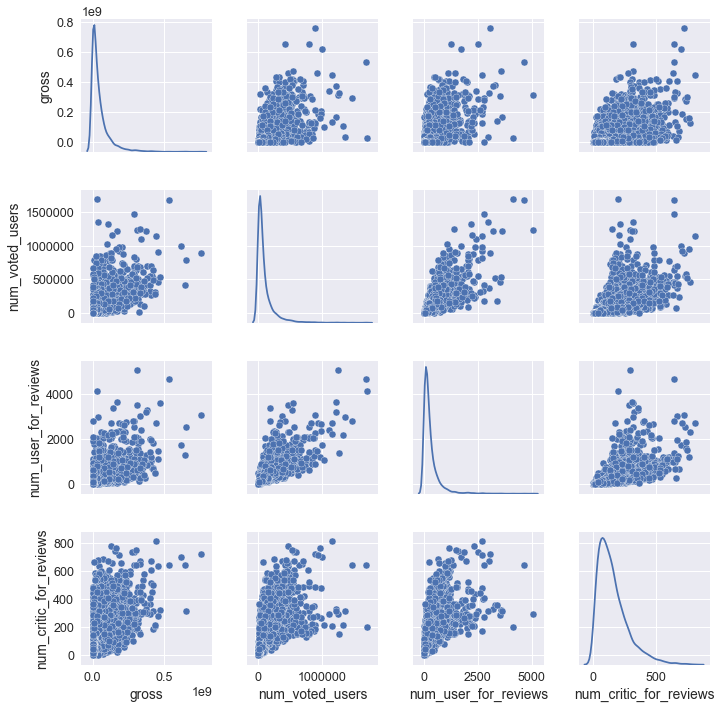

In [163]:
sns.set(font_scale=1.25)
cols = ['gross', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews']
sns.pairplot(df_filling.dropna(how='any')[cols], diag_kind='kde', size=2.5)

In [179]:
from sklearn.linear_model import LinearRegression
def variable_linreg_imputation(df, col_to_predict, ref_col):
    regr = LinearRegression()
    test = df[[col_to_predict,ref_col]].dropna(how='any', axis = 0)
    X = test[ref_col].values.reshape(-1,1)
    Y = test[col_to_predict].values.reshape(-1,1)
    regr.fit(X, Y)
    
    test = df[df[col_to_predict].isnull() & df[ref_col].notnull()]
    for index, row in test.iterrows():
        value = float(regr.predict(row[ref_col]))
        df.set_value(index, col_to_predict, value)

In [180]:
variable_linreg_imputation(df_filling, 'gross', 'num_voted_users')
variable_linreg_imputation(df_filling, 'num_critic_for_reviews', 'num_user_for_reviews')
variable_linreg_imputation(df_filling, 'num_critic_for_reviews', 'num_voted_users')
variable_linreg_imputation(df_filling, 'num_user_for_reviews', 'num_critic_for_reviews')

In [174]:
df = df_filling.copy(deep = True)
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df.shape[0] - missing_df['missing_count']) / df.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

,column_name,missing_count,filling_factor
0,plot_keywords,151,96.930270
1,director_name,102,97.926408
2,director_facebook_likes,102,97.926408
3,actor_3_facebook_likes,23,99.532425
4,title_year,23,99.532425
5,actor_3_name,23,99.532425
6,color,19,99.613743
7,duration,15,99.695060
8,actor_2_name,13,99.735719
9,actor_2_facebook_likes,13,99.735719
